1. Рекомендательная система книг.
2. Решение задачи кредитного скоринга.
3. Подсчет посетителей в магазине по видео камере.


In [1]:
import pandas as pd

## Рекомендательная система книг.

In [2]:
path_books = './data/books.csv'
path_ratings = './data/input/ratings.csv'

In [3]:
books = pd.read_csv(path_books, encoding = "ISO-8859-1")
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [20]:
books = books[["book_id","original_title",'authors']]

In [6]:
ratings = pd.read_csv(path_ratings, encoding = "ISO-8859-1")
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [123]:
full_df = pd.merge(left=books, right=ratings, left_on="book_id", right_on="book_id")
full_df.head()

,book_id,original_title,authors,user_id,rating
0,3,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPrÃ©",314,3
1,3,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPrÃ©",588,1
2,3,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPrÃ©",2077,2
3,3,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPrÃ©",2487,3
4,3,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPrÃ©",2900,3


In [124]:
full_df = full_df.groupby(['book_id', 'authors', 'original_title'], as_index=False).rating.mean()
full_df.head()

,book_id,authors,original_title,rating
0,1,"J.K. Rowling, Mary GrandPrÃ©",Harry Potter and the Half-Blood Prince,4.24
1,2,"J.K. Rowling, Mary GrandPrÃ©",Harry Potter and the Order of the Phoenix,4.21
2,3,"J.K. Rowling, Mary GrandPrÃ©",Harry Potter and the Philosopher's Stone,3.09
3,5,"J.K. Rowling, Mary GrandPrÃ©, Rufus Beck",Harry Potter and the Prisoner of Azkaban,3.89
4,6,"J.K. Rowling, Mary GrandPrÃ©",Harry Potter and the Goblet of Fire,4.09


In [ ]:
1. Подготовка признаков
2. Подбор модели

In [166]:
Corpus = full_df.copy()
Corpus['Review Text'] = full_df['authors'] + " " + full_df['original_title']
Corpus.head()

,book_id,authors,original_title,rating,Review Text
0,1,"J.K. Rowling, Mary GrandPrÃ©",Harry Potter and the Half-Blood Prince,4.24,"J.K. Rowling, Mary GrandPrÃ© Harry Potter and the Half-Blood Prince"
1,2,"J.K. Rowling, Mary GrandPrÃ©",Harry Potter and the Order of the Phoenix,4.21,"J.K. Rowling, Mary GrandPrÃ© Harry Potter and the Order of the Phoenix"
2,3,"J.K. Rowling, Mary GrandPrÃ©",Harry Potter and the Philosopher's Stone,3.09,"J.K. Rowling, Mary GrandPrÃ© Harry Potter and the Philosopher's Stone"
3,5,"J.K. Rowling, Mary GrandPrÃ©, Rufus Beck",Harry Potter and the Prisoner of Azkaban,3.89,"J.K. Rowling, Mary GrandPrÃ©, Rufus Beck Harry Potter and the Prisoner of Azkaban"
4,6,"J.K. Rowling, Mary GrandPrÃ©",Harry Potter and the Goblet of Fire,4.09,"J.K. Rowling, Mary GrandPrÃ© Harry Potter and the Goblet of Fire"


In [167]:
Corpus['Review Text'] = [str(entry).lower() for entry in Corpus['Review Text']] 

Corpus['Review Text']= [word_tokenize(str(entry)) for entry in Corpus['Review Text']] 

In [168]:
tag_map = defaultdict(lambda : wn.NOUN)         
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [169]:
for index,entry in enumerate(Corpus['Review Text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        #print('word' + word)
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            #print('Word final: '+ str(word_Final))
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'Review_final'] = str(Final_words)

In [174]:
Tfidf_vect = TfidfVectorizer(max_features=50)
Tfidf_vect.fit(Corpus['Review_final'])
Train_X_Tfidf = Tfidf_vect.transform(Corpus['Review_final'])

In [175]:
pd.DataFrame(np.hstack([Train_X_Tfidf.toarray(),Corpus.rating.values.reshape(-1,1)]))

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.240000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.210000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.090000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.890000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.936170
790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.677778
791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.460674
792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.336957


## Часть 2

In [177]:
import torch
import torch.nn as nn  # Neural network constructor
import numpy as np # For data manipulation
import matplotlib.pyplot as plt # For plotting

# Creating data for classification
X = torch.from_numpy(Train_X_Tfidf.toarray().astype(np.float32)).float()
y = torch.from_numpy(Corpus.rating.values).float()

# Creating the model
class LR(nn.Module):
    def __init__(self , input_size , output_size):
        super(LR,self).__init__()
        self.linear = nn.Linear(input_size,output_size)
        
    def forward(self,x):
        pred = self.linear(x)
        return pred
    
# Creating the model instance
torch.manual_seed(1)  # Just for you to get similar output as mine
model = LR(50, 1)
print(model)

# Collecting the weights and biases
[w ,b] = model.parameters()
def get_params():
    return(w[0][0].item(),b[0].item())


#Loss anad Optimizer defenitions
criterion = nn.MSELoss() # MSE stands for Mean Square Error
optimizer = torch.optim.SGD(model.parameters() , lr = 0.0001) # SGD stands for Stochastic Gradient Decent , lr = learning rate

#Training
epochs = 100
losses = []

for i_epoch in range(epochs):
    y_pred = model.forward(X) # Forward pass
    loss = criterion(y_pred,y) # Finding the loss
    print("{}/{} Epoch,Loss {}".format(i_epoch,epochs,loss.item())) # Monitoring the loss
    losses.append(loss.item()) # Stroing the loss for later visualization
    optimizer.zero_grad()  #Setting the gradients to zero
    loss.backward()  # Backward pass
    optimizer.step() # Updates the parameters

# Loss vs epochs




LR(
  (linear): Linear(in_features=50, out_features=1, bias=True)
)
0/100 Epoch,Loss 16.07861328125
1/100 Epoch,Loss 16.0721492767334
2/100 Epoch,Loss 16.065683364868164
3/100 Epoch,Loss 16.059223175048828
4/100 Epoch,Loss 16.05276107788086
5/100 Epoch,Loss 16.046306610107422
6/100 Epoch,Loss 16.039854049682617
7/100 Epoch,Loss 16.033401489257812
8/100 Epoch,Loss 16.026952743530273
9/100 Epoch,Loss 16.0205078125
10/100 Epoch,Loss 16.014062881469727
11/100 Epoch,Loss 16.007619857788086
12/100 Epoch,Loss 16.001182556152344
13/100 Epoch,Loss 15.99474811553955
14/100 Epoch,Loss 15.988312721252441
15/100 Epoch,Loss 15.981884002685547
16/100 Epoch,Loss 15.975455284118652
17/100 Epoch,Loss 15.969029426574707
18/100 Epoch,Loss 15.962606430053711
19/100 Epoch,Loss 15.95618724822998
20/100 Epoch,Loss 15.949769973754883
21/100 Epoch,Loss 15.94335651397705
22/100 Epoch,Loss 15.936944007873535
23/100 Epoch,Loss 15.930533409118652
24/100 Epoch,Loss 15.924125671386719
25/100 Epoch,Loss 15.91772174835

/Users/ymochalova/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([794])) that is different to the input size (torch.Size([794, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


LR(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)
0/100 Epoch,Loss 14.579277992248535
1/100 Epoch,Loss 14.573119163513184
2/100 Epoch,Loss 14.566965103149414
3/100 Epoch,Loss 14.56081485748291
4/100 Epoch,Loss 14.554665565490723
5/100 Epoch,Loss 14.5485200881958
6/100 Epoch,Loss 14.542377471923828
7/100 Epoch,Loss 14.536234855651855
8/100 Epoch,Loss 14.530097007751465
9/100 Epoch,Loss 14.523958206176758
10/100 Epoch,Loss 14.517827033996582
11/100 Epoch,Loss 14.511696815490723
12/100 Epoch,Loss 14.50556755065918
13/100 Epoch,Loss 14.499443054199219
14/100 Epoch,Loss 14.49332046508789
15/100 Epoch,Loss 14.487200736999512
16/100 Epoch,Loss 14.481082916259766
17/100 Epoch,Loss 14.474967956542969
18/100 Epoch,Loss 14.468856811523438
19/100 Epoch,Loss 14.462746620178223
20/100 Epoch,Loss 14.456639289855957
21/100 Epoch,Loss 14.450535774230957
22/100 Epoch,Loss 14.44443416595459
23/100 Epoch,Loss 14.438334465026855
24/100 Epoch,Loss 14.43223762512207
25/100 Epoch,Loss 14.426

/Users/ymochalova/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([794])) that is different to the input size (torch.Size([794, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


ValueError: x and y must be the same size

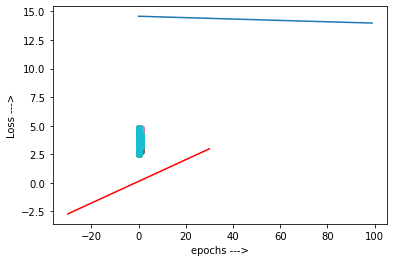

In [165]:
import torch
import torch.nn as nn  # Neural network constructor
import numpy as np # For data manipulation
import matplotlib.pyplot as plt # For plotting

# Creating data for classification
X = torch.from_numpy(Train_X_Tfidf.toarray().astype(np.float32)).float()
y = torch.from_numpy(Corpus.Label.values).float()
plt.plot(X.numpy() , y.numpy(),'o') # For matplotlib to plot the inouts cannot be tensors so we have to convert them into numpy arrays
plt.xlabel('X') # Setting the X label
plt.ylabel('Y') # Setting the Y label

# Creating the model
class LR(nn.Module):
    def __init__(self , input_size , output_size):
        super(LR,self).__init__()
        self.linear = nn.Linear(input_size,output_size)
        
    def forward(self,x):
        pred = self.linear(x)
        return pred
    
# Creating the model instance
torch.manual_seed(1)  # Just for you to get similar output as mine
model = LR(30 , 1)
print(model)

# Collecting the weights and biases
[w ,b] = model.parameters()
def get_params():
    return(w[0][0].item(),b[0].item())


#Loss anad Optimizer defenitions
criterion = nn.MSELoss() # MSE stands for Mean Square Error
optimizer = torch.optim.SGD(model.parameters() , lr = 0.0001) # SGD stands for Stochastic Gradient Decent , lr = learning rate

#Training
epochs = 100
losses = []

for i_epoch in range(epochs):
    y_pred = model.forward(X) # Forward pass
    loss = criterion(y_pred,y) # Finding the loss
    print("{}/{} Epoch,Loss {}".format(i_epoch,epochs,loss.item())) # Monitoring the loss
    losses.append(loss.item()) # Stroing the loss for later visualization
    optimizer.zero_grad()  #Setting the gradients to zero
    loss.backward()  # Backward pass
    optimizer.step() # Updates the parameters

# Loss vs epochs
plt.plot(range(epochs) , losses)
plt.xlabel('epochs --->')
plt.ylabel('Loss --->')

plot_fit("Trained") # Visualizing the trained network


In [144]:
lr = LinearRegression()

In [145]:
lr.build_model()

FileNotFoundError: [Errno 2] No such file or directory: '/input/regression_4_degree_polynomial.pth'

In [147]:
pip install pl_bolts

ERROR: Could not find a version that satisfies the requirement pl_bolts (from versions: none)
ERROR: No matching distribution found for pl_bolts
Note: you may need to restart the kernel to use updated packages.
